In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

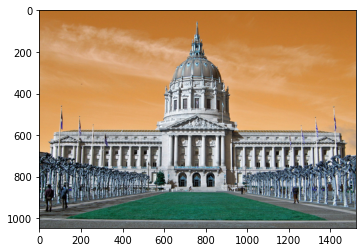

In [15]:
image =  cv2.imread('city_hall.jpg')
#
image_copy = np.copy(image)
image_copy = cv2.cvtColor(image_copy,cv2.COLOR_BGR2RGB)

plt.imshow(image)

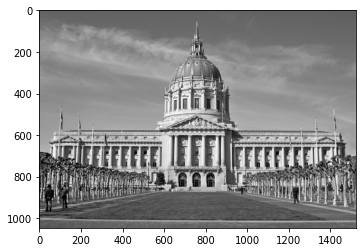

In [16]:
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)

plt.imshow(gray,cmap = 'gray')

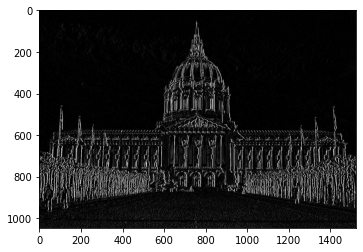

In [28]:
sobel_x = np.array([[-1,0,1],
                   [-2,0,2],
                   [-1,0,1]])

filtered_image = cv2.filter2D(gray,-1,sobel_x) # -1 pastreaza tipul imaginii
plt.imshow(filtered_image,cmap = 'gray')

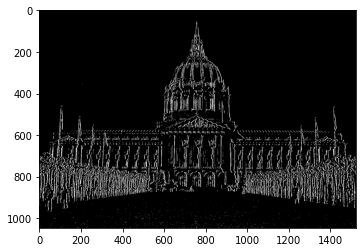

In [29]:
                                                #thresh, in ce se transforma, transformare
retval, binary_image = cv2.threshold(filtered_image,100,255,cv2.THRESH_BINARY)

plt.imshow(binary_image,cmap='gray')

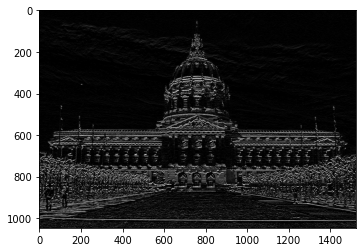

In [31]:
sobel_y = np.array([[-1,-2,-1],
                   [0,0,0],
                   [1,2,1]])

filtered_image = cv2.filter2D(gray,-1,sobel_y) # -1 pastreaza tipul imaginii
plt.imshow(filtered_image,cmap = 'gray')

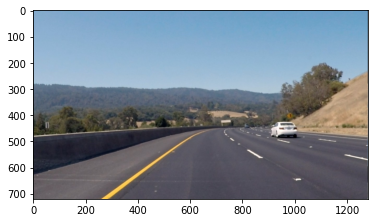

In [32]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

%matplotlib inline

# Read in the image
image = mpimg.imread('curved_lane.jpg')

plt.imshow(image)

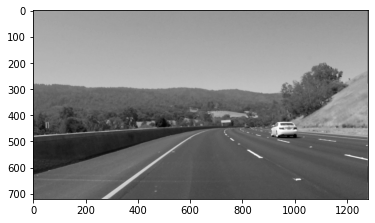

In [33]:
# Convert to grayscale for filtering
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')

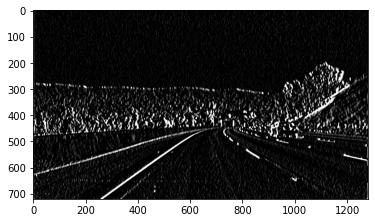

In [37]:
# Create a custom kernel

# 3x3 array for edge detection
sobel_y = np.array([[ -1, -2, -1],
                   [ 0, 0, 0],
                   [ 1, 2, 1]])

## TODO: Create and apply a Sobel x operator

sobel_x = np.array([[-1,0,1],
                   [-2,0,2],
                   [-1,0,1]])

sobel_x = np.array([[-4,-2,0,2,4],
                   [-2,-1,0,1,2],
                   [0,0,0,0,0],
                   [-2,-1,-0,1,2],
                   [-4,-2,0,2,4]])

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)
filtered_image = cv2.filter2D(gray, -1, sobel_x)
# filtered_image = cv2.filter2D(filtered_image,-1,sobel_y)

plt.imshow(filtered_image, cmap='gray')

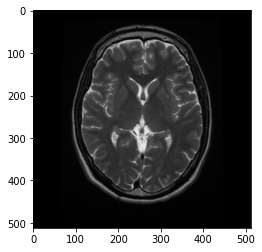

In [43]:
image = cv2.imread('brain_MR.jpg')

image_copy = np.copy(image)

image_copy = cv2.cvtColor(image_copy,cv2.COLOR_BGR2RGB)

plt.imshow(image_copy, cmap='gray')

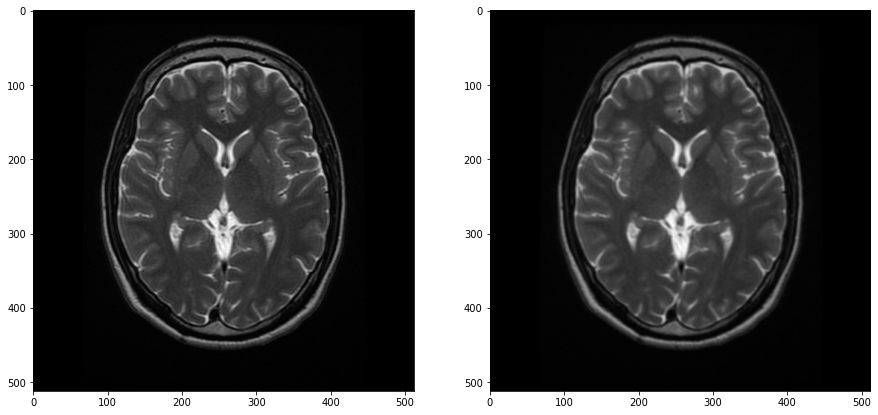

In [55]:
gray = cv2.cvtColor(image_copy,cv2.COLOR_RGB2GRAY)

gray_blur = cv2.GaussianBlur(gray,(5,5),0)

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,10))

ax1.imshow(gray, cmap = 'gray')
ax2.imshow(gray_blur, cmap = 'gray')

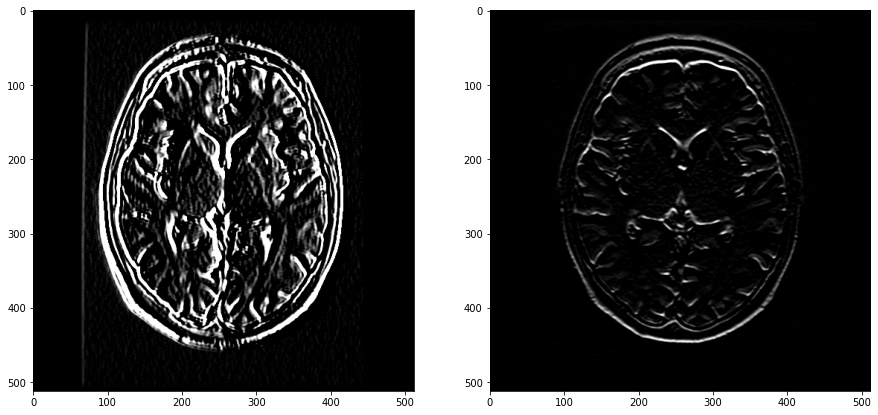

In [56]:
sobel_x = np.array([[-1,0,1],
                   [-2,0,2],
                   [-1,0,1]])

sobel_x = np.array([[-4,-2,0,2,4],
                   [-2,-1,0,1,2],
                   [0,0,0,0,0],
                   [-2,-1,-0,1,2],
                   [-4,-2,0,2,4]])

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)
filtered_image = cv2.filter2D(gray, -1, sobel_x)
filtered_blur = cv2.filter2D(gray_blur,-1,sobel_y)
# filtered_image = cv2.filter2D(filtered_image,-1,sobel_y)

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,10))

ax1.imshow(filtered_image, cmap = 'gray')
ax2.imshow(filtered_blur, cmap = 'gray')

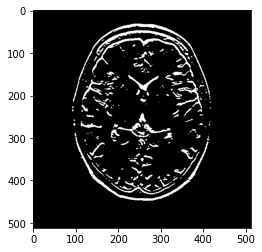

In [57]:

retval, binary_image = cv2.threshold(filtered_blur, 25, 255, cv2.THRESH_BINARY)

plt.imshow(binary_image, cmap='gray')

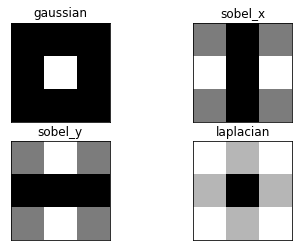

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Define gaussian, sobel, and laplacian (edge) filters

gaussian = (1/9)*np.array([[1, 1, 1],
                           [1, 1, 1],
                           [1, 1, 1]])

sobel_x= np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

sobel_y= np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])

# laplacian, edge filter
laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])

filters = [gaussian, sobel_x, sobel_y, laplacian]
filter_name = ['gaussian','sobel_x', \
                'sobel_y', 'laplacian']


# perform a fast fourier transform on each filter
# and create a scaled, frequency transform image
f_filters = [np.fft.fft2(x) for x in filters]
fshift = [np.fft.fftshift(y) for y in f_filters]
frequency_tx = [np.log(np.abs(z)+1) for z in fshift]

# display 4 filters
for i in range(len(filters)):
    plt.subplot(2,2,i+1),plt.imshow(frequency_tx[i],cmap = 'gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])

plt.show()